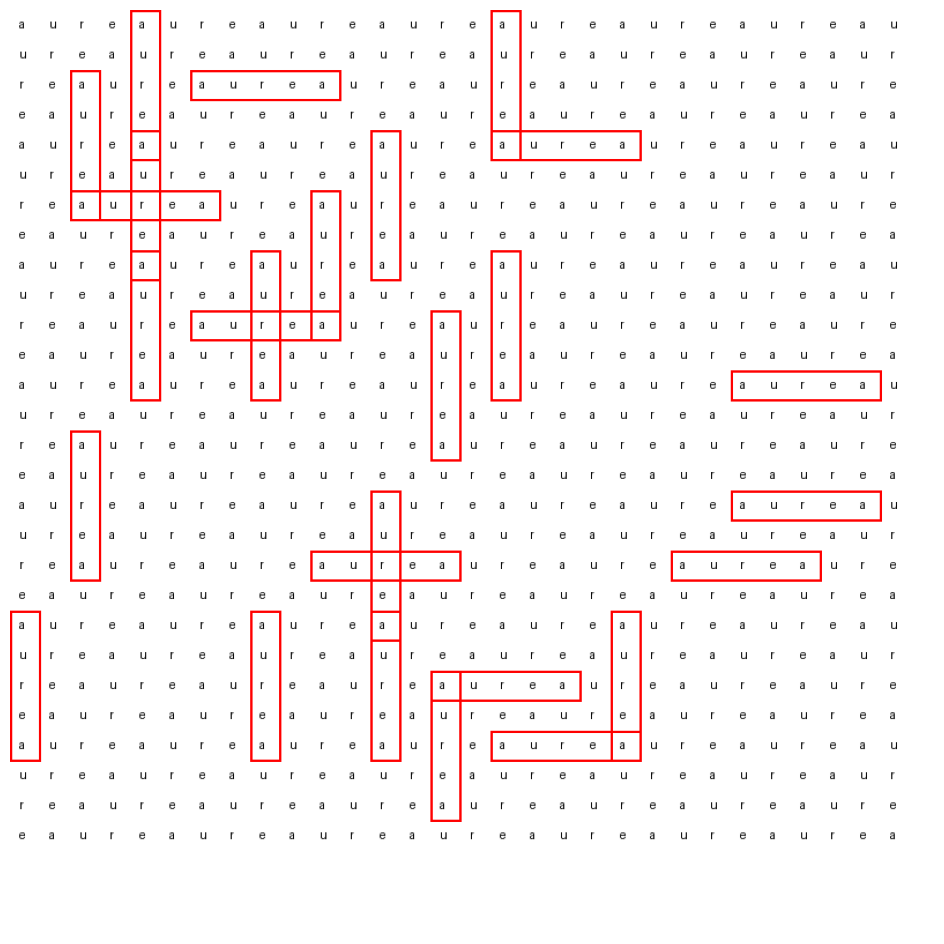

In [101]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np

def draw_horizontal_rect(draw, rect_width, rect_height, center_r_col, center_r_row, cell_size):
    """Draw a horizontal rectangle centered on the 'r' letter at the given grid position"""
    center_x = center_r_col * cell_size
    center_y = center_r_row * cell_size + cell_size/2
    draw.rectangle([center_x, center_y - rect_height/2,
                   center_x + rect_width, center_y + rect_height/2],
                   outline='red', width=2)
        
def draw_vertical_rect(draw,rect_width, rect_height, center_r_col, center_r_row, cell_size):
    """Draw a vertical rectangle centered on the 'r' letter at the given grid position"""
    center_x = center_r_col * cell_size
    center_y = center_r_row * cell_size + cell_size/2
    draw.rectangle([center_x, center_y - rect_width/2,
                   center_x + rect_height, center_y + rect_width/2],
                   outline='red', width=2)


def create_letter_grid(width=800, height=800, cell_size=26):
    # Create a white background
    image = Image.new('RGB', (width, height), 'white')
    draw = ImageDraw.Draw(image)
    
    # Try to load Arial font, fallback to default if not available
    try:
        font = ImageFont.truetype("arial.ttf", cell_size//2)
    except:
        font = ImageFont.load_default()
    
    # Define the sequence
    sequence = ['a', 'u', 'r', 'e']
    
    # Calculate grid dimensions
    cols = width // cell_size
    rows = height // cell_size
    
    # Create a matrix to track where letters have been placed
    grid = [[' ' for _ in range(cols)] for _ in range(rows)]
    
    # Create the grid with multiple word rows
    num_word_rows = rows // len(sequence)  # Number of complete word sequences that can fit
    
    # Draw a rectangle with circular ends around first sequence
    rect_width = cell_size * 5  # Width to cover 4 letters
    rect_height = cell_size * 1.0  # Height of rectangle
    
    

    
    for col in range(0, cols):
        # For each column, place multiple sequences starting with that column's letter
        col_letter = sequence[col % len(sequence)]  # Get letter based on column position
        
        for word_row in range(num_word_rows):
            # Calculate vertical offset for this word row
            y_offset = word_row * len(sequence) * cell_size
            
            # Create sequence for this column
            curr_sequence = []
            for i in range(len(sequence)):
                curr_sequence.append(sequence[(col + i) % len(sequence)])
                
            # Draw the vertical sequence
            for i in range(len(sequence)):
                letter = curr_sequence[i]
                x = col * cell_size + cell_size//3
                y = y_offset + i * cell_size + cell_size//4
                draw.text((x, y), letter, fill='black', font=font)
                grid[word_row * len(sequence) + i][col] = letter


    # Draw the centered horizontal rectangle
    horizontal_rect_idxs = []
    vertical_rect_idxs = []
    for i in range(0, cols-4, 4):
        for j in range(0, rows, 4):
            # draw_horizontal_rect(draw, rect_width, rect_height, center_r_col=i, center_r_row=j, cell_size=cell_size)
            horizontal_rect_idxs.append(("h",i, j))
    
    for i in range(2, cols-4, 4):
        for j in range(2, rows, 4):
            # draw_horizontal_rect(draw, rect_width, rect_height, center_r_col=i, center_r_row=j, cell_size=cell_size)
            horizontal_rect_idxs.append(("h",i, j))
    
    for i in range(0, cols-4, 4):
        for j in range(2, rows, 4):
            # draw_vertical_rect(draw, rect_width, rect_height, center_r_col=i, center_r_row=j, cell_size=cell_size)
            vertical_rect_idxs.append(("v",i, j))

    for i in range(2, cols-4, 4):
        for j in range(4, rows-4, 4):
            # draw_vertical_rect(draw, rect_width, rect_height, center_r_col=i, center_r_row=j, cell_size=cell_size)
            vertical_rect_idxs.append(("v",i, j))

    all_idxs = horizontal_rect_idxs + vertical_rect_idxs
    # Randomly shuffle all rectangle indices and select a subset
    import random
    random.shuffle(all_idxs)
    # Keep approximately 75% of the rectangles
    all_idxs = all_idxs[:int(len(all_idxs) * 0.15)]
    for idx in all_idxs:
        if idx[0] == "h":
            draw_horizontal_rect(draw, rect_width, rect_height, center_r_col=idx[1], center_r_row=idx[2], cell_size=cell_size)
        else:
            draw_vertical_rect(draw, rect_width, rect_height, center_r_col=idx[1], center_r_row=idx[2], cell_size=cell_size)

    # # Draw the centered vertical rectangle
    # for i in range(2, cols, 4):
    #     for j in range(0, rows, 4):
    #         draw_vertical_rect(draw, rect_width, rect_height, center_r_col=i, center_r_row=j, cell_size=cell_size)

    # # Draw the centered vertical rectangle
    # for i in range(2, cols, 4):
    #     for j in range(0, rows, 4):

    # # Draw grid lines (optional - comment out if you don't want them)
    # for i in range(cols + 1):
    #     x = i * cell_size
    #     draw.line([(x, 0), (x, height)], fill='lightgray', width=1)
    
    # for i in range(rows + 1):
    #     y = i * cell_size
    #     draw.line([(0, y), (width, y)], fill='lightgray', width=0)
    
    return image

# Create the image
grid_image = create_letter_grid()

# Display the image in the notebook
plt.figure(figsize=(12, 12))
plt.imshow(grid_image)
plt.axis('off')
plt.show()